<a href="https://colab.research.google.com/github/Hyerinrin/AI-Lesson/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A511%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

#데이터 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#LeNet-5신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())#한 줄로 세우기
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

#신경망 모델학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

#정확률
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30
469/469 - 46s - loss: 0.2049 - accuracy: 0.9376 - val_loss: 0.0505 - val_accuracy: 0.9834 - 46s/epoch - 97ms/step
Epoch 2/30
469/469 - 45s - loss: 0.0537 - accuracy: 0.9830 - val_loss: 0.0360 - val_accuracy: 0.9873 - 45s/epoch - 96ms/step
Epoch 3/30
469/469 - 45s - loss: 0.0370 - accuracy: 0.9883 - val_loss: 0.0311 - val_accuracy: 0.9892 - 45s/epoch - 97ms/step
Epoch 4/30
469/469 - 46s - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0334 - val_accuracy: 0.9889 - 46s/epoch - 97ms/step
Epoch 5/30
469/469 - 46s - loss: 0.0233 - accuracy: 0.9928 - val_loss: 0.0293 - val_accuracy: 0.9908 - 46s/epoch - 98ms/step
Epoch 6/30
469/469 - 50s - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0341 - val_accuracy: 0.9895 - 50s/epoch - 106ms/step
Epoch 7/30
469/469 - 67s - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0323 - val_accuracy: 0.9900 - 67s/epoch - 142ms/step
Epoch 8/30
469/469 - 53s - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.0370 - val_accuracy: 0.9895 - 53s/epoch - 112ms/st

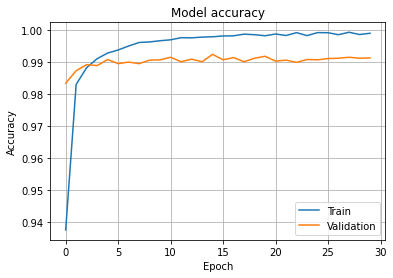

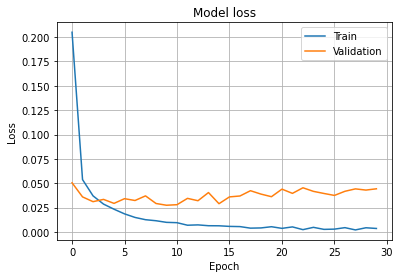

In [ ]:
import matplotlib.pyplot as plt

#정확률
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
#손실함수
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

Epoch 1/12
469/469 - 134s - loss: 0.2791 - accuracy: 0.9143 - val_loss: 0.0532 - val_accuracy: 0.9833 - 134s/epoch - 286ms/step
Epoch 2/12
469/469 - 131s - loss: 0.0995 - accuracy: 0.9709 - val_loss: 0.0434 - val_accuracy: 0.9856 - 131s/epoch - 279ms/step
Epoch 3/12
469/469 - 130s - loss: 0.0750 - accuracy: 0.9777 - val_loss: 0.0425 - val_accuracy: 0.9869 - 130s/epoch - 277ms/step
Epoch 4/12
469/469 - 130s - loss: 0.0628 - accuracy: 0.9815 - val_loss: 0.0297 - val_accuracy: 0.9897 - 130s/epoch - 276ms/step
Epoch 5/12
469/469 - 130s - loss: 0.0563 - accuracy: 0.9829 - val_loss: 0.0294 - val_accuracy: 0.9894 - 130s/epoch - 278ms/step
Epoch 6/12
469/469 - 133s - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0307 - val_accuracy: 0.9894 - 133s/epoch - 285ms/step
Epoch 7/12
469/469 - 137s - loss: 0.0427 - accuracy: 0.9868 - val_loss: 0.0292 - val_accuracy: 0.9900 - 137s/epoch - 292ms/step
Epoch 8/12
469/469 - 159s - loss: 0.0390 - accuracy: 0.9874 - val_loss: 0.0314 - val_accuracy: 0.9897 - 

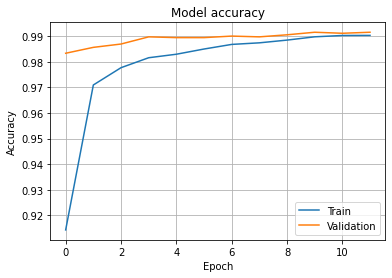

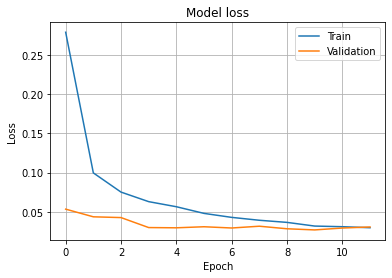

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

#데이터 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#c-c-p-fc-fc구조 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))#25%를 버리고 학습해라..
cnn.add(Flatten())#한 줄로 세우기(다차원->1차원으로)
cnn.add(Dense(84,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

#신경망 모델학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

#정확률
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

#정확률
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
#손실함수
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

Epoch 1/30
391/391 - 5s - loss: 1.6121 - accuracy: 0.4051 - val_loss: 1.3021 - val_accuracy: 0.5298 - 5s/epoch - 12ms/step
Epoch 2/30
391/391 - 4s - loss: 1.2455 - accuracy: 0.5527 - val_loss: 1.1153 - val_accuracy: 0.6053 - 4s/epoch - 9ms/step
Epoch 3/30
391/391 - 4s - loss: 1.0851 - accuracy: 0.6158 - val_loss: 1.0237 - val_accuracy: 0.6409 - 4s/epoch - 9ms/step
Epoch 4/30
391/391 - 4s - loss: 0.9822 - accuracy: 0.6522 - val_loss: 0.9176 - val_accuracy: 0.6761 - 4s/epoch - 10ms/step
Epoch 5/30
391/391 - 4s - loss: 0.9022 - accuracy: 0.6795 - val_loss: 0.8112 - val_accuracy: 0.7144 - 4s/epoch - 9ms/step
Epoch 6/30
391/391 - 4s - loss: 0.8474 - accuracy: 0.6998 - val_loss: 0.7734 - val_accuracy: 0.7313 - 4s/epoch - 9ms/step
Epoch 7/30
391/391 - 4s - loss: 0.8019 - accuracy: 0.7175 - val_loss: 0.7479 - val_accuracy: 0.7351 - 4s/epoch - 9ms/step
Epoch 8/30
391/391 - 4s - loss: 0.7538 - accuracy: 0.7342 - val_loss: 0.7284 - val_accuracy: 0.7449 - 4s/epoch - 10ms/step
Epoch 9/30
391/391 - 

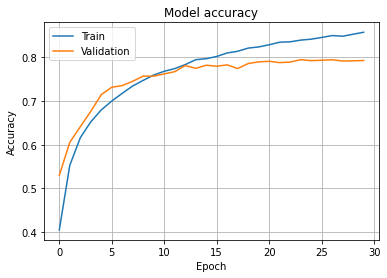

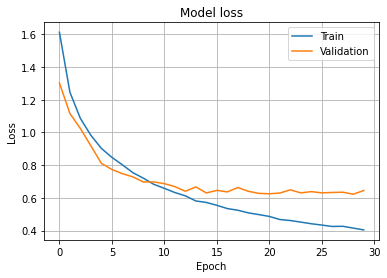

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

#신경망 모델학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

#정확률
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

#정확률
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
#손실함수
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")

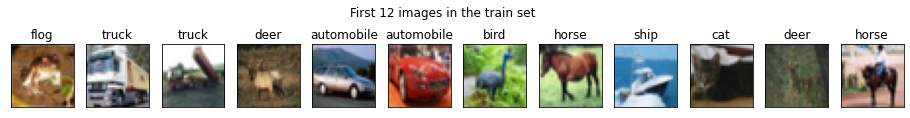

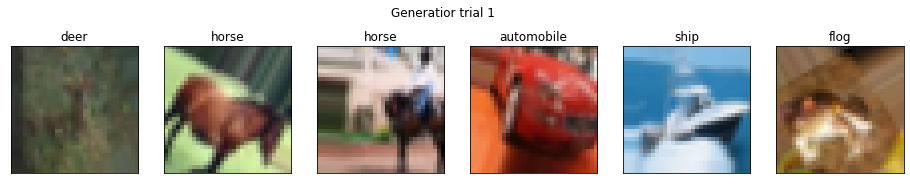

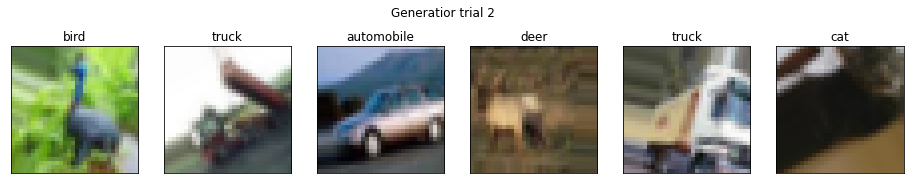

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#cifar-10의 부류 이름
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']

#신경망 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype('float32');x_train/=255
x_train=x_train[0:12,];y_train=y_train[0:12,] #앞 12개에만 증대 적용

#앞 12개 영상 보여줌
plt.figure(figsize=(16,2))
plt.suptitle("First 12 images in the train set")
for i in range(12):
  plt.subplot(1,12,i+1)
  plt.imshow(x_train[i])
  plt.xticks([]); plt.yticks([])
  plt.title(class_names[int(y_train[i])])

  #영상 증대기 생성
batch_siz=6
generator=ImageDataGenerator(rotation_range=30.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
gen=generator.flow(x_train,y_train,batch_size=batch_siz)

#첫 번째 증대
img,label=gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generatior trial 1")
for i in range(batch_siz):
  plt.subplot(1,batch_siz,i+1)
  plt.imshow(img[i])
  plt.xticks([]);plt.yticks([])
  plt.title(class_names[int(label[i])])

#두 번째 증대
img,label=gen.next()
plt.figure(figsize=(16,3))
plt.suptitle("Generatior trial 2")
for i in range(batch_siz):
  plt.subplot(1,batch_siz,i+1)
  plt.imshow(img[i])
  plt.xticks([]);plt.yticks([])
  plt.title(class_names[int(label[i])])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


391/391 - 20s - loss: 1.7466 - accuracy: 0.3523 - val_loss: 1.4668 - val_accuracy: 0.4751 - 20s/epoch - 52ms/step
Epoch 2/50
391/391 - 20s - loss: 1.3931 - accuracy: 0.4968 - val_loss: 1.2287 - val_accuracy: 0.5528 - 20s/epoch - 51ms/step
Epoch 3/50
391/391 - 19s - loss: 1.2314 - accuracy: 0.5608 - val_loss: 1.0777 - val_accuracy: 0.6172 - 19s/epoch - 49ms/step
Epoch 4/50
391/391 - 20s - loss: 1.1220 - accuracy: 0.6005 - val_loss: 1.0135 - val_accuracy: 0.6447 - 20s/epoch - 51ms/step
Epoch 5/50
391/391 - 20s - loss: 1.0504 - accuracy: 0.6299 - val_loss: 0.8650 - val_accuracy: 0.6950 - 20s/epoch - 51ms/step
Epoch 6/50
391/391 - 20s - loss: 0.9935 - accuracy: 0.6508 - val_loss: 0.8304 - val_accuracy: 0.7095 - 20s/epoch - 50ms/step
Epoch 7/50
391/391 - 19s - loss: 0.9523 - accuracy: 0.6629 - val_loss: 0.8017 - val_accuracy: 0.7165 - 19s/epoch - 49ms/step
Epoch 8/50
391/391 - 19s - loss: 0.9122 - accuracy: 0.6809 - val_loss: 0.7913 - val_accuracy: 0.7182 - 19s/epoch - 49ms/step
Epoch 9/50


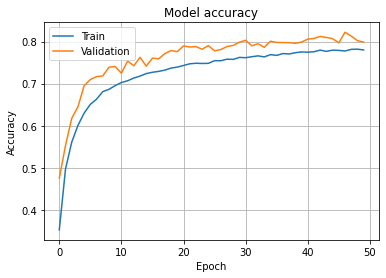

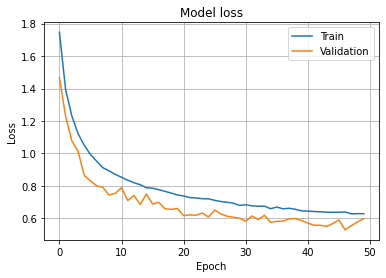

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

#신경망 모델학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
#hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)
batch_siz=128
generator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
hist=cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2)

#정확률
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

#정확률
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
#손실함수
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")

드롭아웃 적용 안할 때: 0.7281399965286255
드롭아웃 적용 할 때: 0.7521200180053711


{'boxes': [<matplotlib.lines.Line2D at 0x7fedb5060f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fedb4367f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fee2b21a350>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fedb4367250>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fedb420ca90>,
  <matplotlib.lines.Line2D at 0x7fee2b5a2210>]}

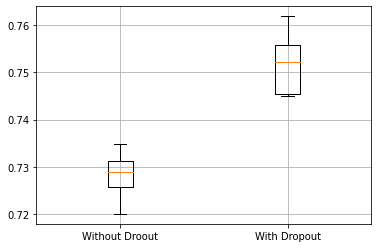

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#하이퍼 매개 변수
batch_siz=128
n_epoch=10
k=5

#드롭아웃 비율에 따라 교차 검증을 하고 정확률을 반환하는 함수
def cross_validation(dropout_rate):
  accuracy=[]
  for train_index,val_index in KFold(k).split(x_train):
    xtrain,xval=x_train[train_index],x_train[val_index]
    ytrain,yval=y_train[train_index],y_train[val_index]

    #신경망 모델 설계
    cnn=Sequential()
    cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
    cnn.add(Conv2D(32,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[0]))
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[1]))
    cnn.add(Flatten())
    cnn.add(Dense(512,activation='relu'))
    cnn.add(Dropout(dropout_rate[2]))
    cnn.add(Dense(10,activation='softmax'))

    cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
    cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,verbose=0)
    accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
  return accuracy

acc_without_dropout=cross_validation([0.0,0.0,0.0])
acc_with_dropout=cross_validation([0.25,0.25,0.5])

print("드롭아웃 적용 안할 때:",np.array(acc_without_dropout).mean())
print("드롭아웃 적용 할 때:",np.array(acc_with_dropout).mean())


#박스 플롯
plt.grid()
plt.boxplot([acc_without_dropout,acc_with_dropout],labels=["Without Droout","With Dropout"])
    


Epoch 1/10
313/313 - 14s - loss: 1.5410 - accuracy: 0.4391 - val_loss: 1.3757 - val_accuracy: 0.5085 - 14s/epoch - 44ms/step
Epoch 2/10
313/313 - 3s - loss: 1.1733 - accuracy: 0.5853 - val_loss: 1.0692 - val_accuracy: 0.6226 - 3s/epoch - 10ms/step
Epoch 3/10
313/313 - 3s - loss: 0.9728 - accuracy: 0.6591 - val_loss: 0.9899 - val_accuracy: 0.6505 - 3s/epoch - 10ms/step
Epoch 4/10
313/313 - 3s - loss: 0.8340 - accuracy: 0.7087 - val_loss: 0.8919 - val_accuracy: 0.6983 - 3s/epoch - 10ms/step
Epoch 5/10
313/313 - 3s - loss: 0.7075 - accuracy: 0.7538 - val_loss: 0.8528 - val_accuracy: 0.7067 - 3s/epoch - 10ms/step
Epoch 6/10
313/313 - 3s - loss: 0.6019 - accuracy: 0.7887 - val_loss: 0.8183 - val_accuracy: 0.7232 - 3s/epoch - 10ms/step
Epoch 7/10
313/313 - 3s - loss: 0.4922 - accuracy: 0.8281 - val_loss: 0.8242 - val_accuracy: 0.7200 - 3s/epoch - 10ms/step
Epoch 8/10
313/313 - 3s - loss: 0.4011 - accuracy: 0.8606 - val_loss: 0.9140 - val_accuracy: 0.7157 - 3s/epoch - 10ms/step
Epoch 9/10
313

{'boxes': [<matplotlib.lines.Line2D at 0x7f63ba8eca50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f63ba7267d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f63ba8ee110>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f63ba8ee350>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f63ba726a10>,
  <matplotlib.lines.Line2D at 0x7f63ee04f250>]}

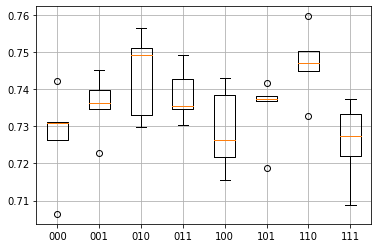

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

#하이퍼 매개 변수
batch_siz=128
n_epoch=10
k=5

#드롭아웃 비율에 따라 교차 검증을 하고 정확률을 반환하는 함수
def cross_validation(data_gen,dropout_rate,l2_reg):
  accuracy=[]
  for train_index,val_index in KFold(k).split(x_train):
    xtrain,xval=x_train[train_index],x_train[val_index]
    ytrain,yval=y_train[train_index],y_train[val_index]

    #신경망 모델 설계
    cnn=Sequential()
    cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
    cnn.add(Conv2D(32,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[0]))
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(Conv2D(64,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2,2)))
    cnn.add(Dropout(dropout_rate[1]))
    cnn.add(Flatten())
    cnn.add(Dense(512,activation='relu'))
    cnn.add(Dropout(dropout_rate[2]))
    cnn.add(Dense(10,activation='softmax',kernel_regularizer=regularizers.l2(l2_reg)))

    cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
    if data_gen:
      generator=ImageDataGenerator(rotation_range=3.0,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
      cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)
    else:
      cnn.fit(xtrain,ytrain,batch_size=batch_siz,epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)
    accuracy.append(cnn.evaluate(xval,yval,verbose=0)[1])
  return accuracy

#하이퍼 매개변수를 달리 하며 신경망 모델 평기
acc_000=cross_validation(False,[0.0,0.0,0.0],0.0)
acc_001=cross_validation(False,[0.0,0.0,0.0],0.01)
acc_010=cross_validation(False,[0.25,0.25,0.5],0.0)
acc_011=cross_validation(False,[0.25,0.25,0.5],0.01)
acc_100=cross_validation(False,[0.0,0.0,0.0],0.0)
acc_101=cross_validation(False,[0.0,0.0,0.0],0.01)
acc_110=cross_validation(False,[0.25,0.25,0.5],0.0)
acc_111=cross_validation(False,[0.25,0.25,0.5],0.01)

print("출력 형식: [Data augumentation-Dropout-12 regularizer] (교차검증 시도/평균)")
print("[000](",acc_000,"/",np.array(acc_000).mean(),")")
print("[001](",acc_001,"/",np.array(acc_001).mean(),")")
print("[010](",acc_010,"/",np.array(acc_010).mean(),")")
print("[011](",acc_011,"/",np.array(acc_011).mean(),")")
print("[100](",acc_100,"/",np.array(acc_100).mean(),")")
print("[101](",acc_101,"/",np.array(acc_101).mean(),")")
print("[110](",acc_110,"/",np.array(acc_110).mean(),")")
print("[111](",acc_111,"/",np.array(acc_111).mean(),")")

#박스 플롯
plt.grid()
plt.boxplot([acc_000,acc_001,acc_010,acc_011,acc_100,acc_101,acc_110,acc_111],labels=["000","001","010","011","100","101","110","111"])

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
import os

train_folder='CUB200/train'
test_folder='CUB200/test'

class_reduce=0.1
no_class=int(len(os.listdir(train_folder))*class_reduce)
x_train,y_train=[],[]
for i,class_name in enumerate(os.listdir(train_folder)):
  if i<no_class:
    for fname in os.listdir(train_folder+'/'+class_name):
      img=image.load_img(train_folder+'/'+class_name+'/'+fname,target_size=(224,224))
      if len(img.getbands())!=3:
        print("주의:유효하지 않은 영상 발생",class_name,fname)
        continue
      x=image.img_to_array(img)
      x=preprocess_input(x)
      x_test.append(x)
      y_test.append(i)

x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)
y_train=tf.keras.utils.to_categorical(y_train,no_class)
y_test=tf.keras.utils.to_categorical(y_test,no_class)

base_model=ResNet50(weights='imagenet',include_top=False, input_shape=(224,224,3))
cnn=Sequential()
cnn.add(base_model)
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(no_class,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(0.00002),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=16,epochs=10,validation_data=(x_test,y_test),verbose=1)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

FileNotFoundError: ignored